# Aufgabe 2

## Importe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from mlxtend.data import loadlocal_mnist

# Imports for a keras tensorflow model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import backend as K

## Variabeln

In [3]:
epochs = 20
batch_size = 128
sgd = SGD(0.01)

## Dataset

In [4]:
# Grab the MNIST dataset, it has already training and testing data
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

# Each image in the MNIST dataset is represented as a 28x28x1, this needs to be flattened to be used by the ffnn
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# Scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...


In [5]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

print(trainY)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)
[9 0 0 ... 3 0 5]


### Encode data

In [6]:
# One-hot-encoding
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

print(trainY)

[[0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## a) Model

In [7]:
activation_functions = ["relu","sigmoid","tanh", "softplus", "softsign", "selu", "elu"] 
# softmax and exponential activation functions are not working in this setup therefore they are not included in this list

In [8]:
# define the cnn (Conv, Conv, Flatten, Output) with the different activations using Keras
models = []
for ac in activation_functions:
    print(f"Building model with {ac} as activation function")
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation=ac, input_shape=(28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation=ac))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    models.append((model, ac, _))

Building model with relu as activation function
Building model with sigmoid as activation function
Building model with tanh as activation function
Building model with softplus as activation function
Building model with softsign as activation function
Building model with selu as activation function
Building model with elu as activation function


## b) Training

In [9]:
# Train with SGD, Gradient descent (with momentum) optimizer
print("[INFO] training networks...")
for i in range(len(models)):
    model, activation, _ = models[i]
    print(f"\n[Info] {activation = }")
    model.compile(loss="categorical_crossentropy", optimizer=sgd,
        metrics=["accuracy"])
    H = model.fit(trainX, trainY, validation_data=(testX, testY),
        epochs=epochs, batch_size=batch_size)
    models[i] = (model, activation, H)

[INFO] training networks...

[Info] activation = 'relu'
Epoch 1/20
469/469 [==============================] - 34s 72ms/step - loss: 1.0959 - accuracy: 0.6353 - val_loss: 0.9098 - val_accuracy: 0.7443
Epoch 2/20
469/469 [==============================] - 34s 72ms/step - loss: 0.6532 - accuracy: 0.7684 - val_loss: 0.6054 - val_accuracy: 0.7851
Epoch 3/20
469/469 [==============================] - 34s 72ms/step - loss: 0.5823 - accuracy: 0.7907 - val_loss: 0.6117 - val_accuracy: 0.7732
Epoch 4/20
469/469 [==============================] - 33s 70ms/step - loss: 0.5367 - accuracy: 0.8062 - val_loss: 0.5484 - val_accuracy: 0.8055
Epoch 5/20
469/469 [==============================] - 32s 68ms/step - loss: 0.5046 - accuracy: 0.8200 - val_loss: 0.5473 - val_accuracy: 0.7928
Epoch 6/20
469/469 [==============================] - 32s 69ms/step - loss: 0.4771 - accuracy: 0.8317 - val_loss: 0.4778 - val_accuracy: 0.8318
Epoch 7/20
469/469 [==============================] - 33s 71ms/step - loss: 0.45

## c) Evaluation

In [10]:
def plot_trainingAccLoss(H):
    # plot the training accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

    # plot the training loss

    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.title("Training Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

[INFO] evaluating network...

[Info] activation = 'relu'
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.74      0.87      0.80      1000
           3       0.85      0.90      0.88      1000
           4       0.82      0.74      0.78      1000
           5       0.97      0.96      0.96      1000
           6       0.70      0.64      0.67      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.96      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



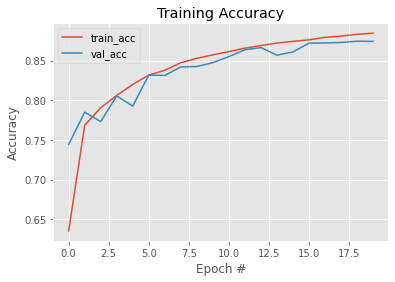

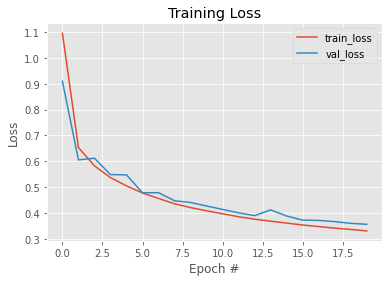


[Info] activation = 'sigmoid'
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1000
           1       0.96      0.92      0.94      1000
           2       0.77      0.55      0.64      1000
           3       0.77      0.86      0.81      1000
           4       0.66      0.78      0.72      1000
           5       0.94      0.91      0.92      1000
           6       0.50      0.54      0.52      1000
           7       0.89      0.93      0.91      1000
           8       0.92      0.94      0.93      1000
           9       0.94      0.92      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000



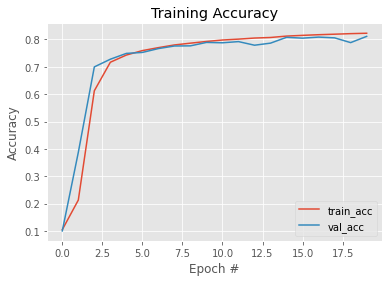

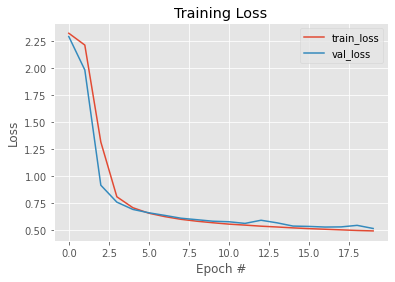


[Info] activation = 'tanh'
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.82      0.78      0.80      1000
           3       0.85      0.90      0.88      1000
           4       0.84      0.73      0.78      1000
           5       0.97      0.96      0.97      1000
           6       0.61      0.73      0.66      1000
           7       0.94      0.93      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



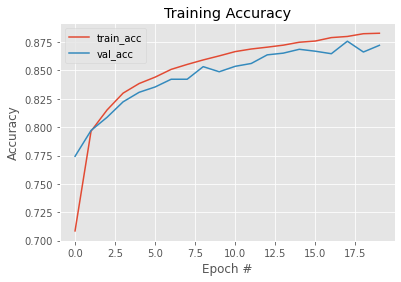

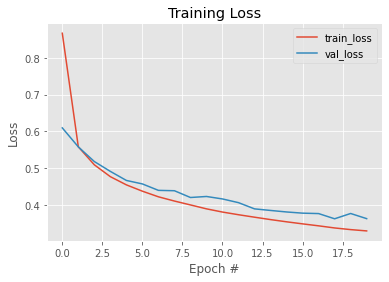


[Info] activation = 'softplus'
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1000
           1       0.98      0.94      0.96      1000
           2       0.68      0.79      0.73      1000
           3       0.76      0.91      0.83      1000
           4       0.78      0.67      0.72      1000
           5       0.95      0.94      0.95      1000
           6       0.64      0.49      0.56      1000
           7       0.93      0.93      0.93      1000
           8       0.94      0.95      0.95      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



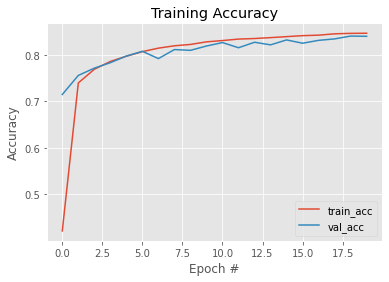

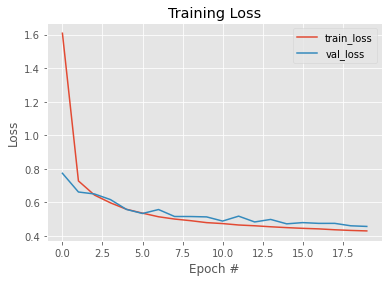


[Info] activation = 'softsign'
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1000
           1       0.99      0.96      0.97      1000
           2       0.75      0.81      0.78      1000
           3       0.89      0.86      0.87      1000
           4       0.76      0.78      0.77      1000
           5       0.97      0.95      0.96      1000
           6       0.70      0.55      0.62      1000
           7       0.92      0.94      0.93      1000
           8       0.94      0.96      0.95      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



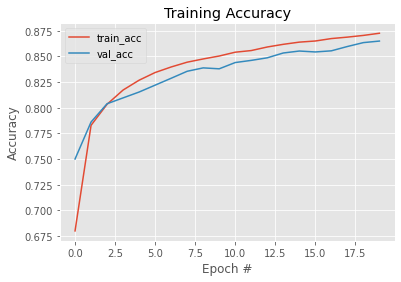

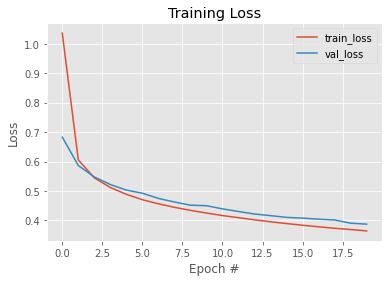


[Info] activation = 'selu'
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.89      0.71      0.79      1000
           3       0.90      0.87      0.89      1000
           4       0.79      0.82      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.64      0.71      0.67      1000
           7       0.93      0.96      0.95      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



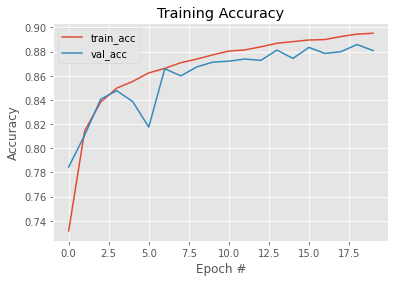

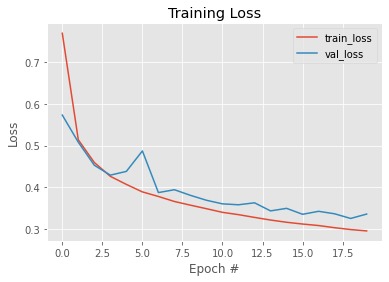


[Info] activation = 'elu'
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.97      0.97      0.97      1000
           2       0.82      0.79      0.80      1000
           3       0.88      0.88      0.88      1000
           4       0.76      0.86      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.74      0.60      0.66      1000
           7       0.91      0.96      0.94      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



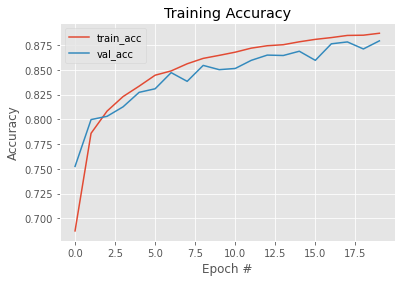

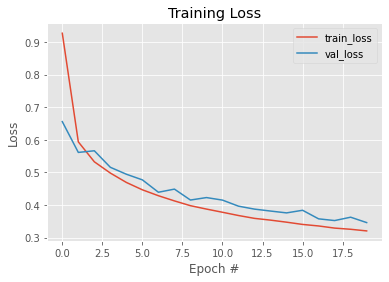

In [11]:
print("[INFO] evaluating network...")
for model, activation, H in models:
    print(f"\n[Info] {activation = }")
    predictions = model.predict(testX, batch_size=batch_size)
    print(classification_report(testY.argmax(axis=1),
	    predictions.argmax(axis=1),
	    target_names=[str(x) for x in lb.classes_]))
    plot_trainingAccLoss(H)

## d) ANN vs CNN

Der CNN hat im Vergleich zum ANN eine geringfügig bessere Genauigkeit, benötigt hierfür aber deutlich länger zum Berechnen.

## e) Complexity

Hier soll die Anzahl der Schichten und deren Einfluss betrachtet werden.

Daten:  
Größe Filter: 3x3  
Neuronen Convolution Schicht: 32  
Pooling: 2x2 mit MaxPooling  
Startnetzwerk: Conv2D-Conv2D-MaxPooling-Flatten-Dense  
Erweiterung: eine weitere Conv2d + Pooling Schicht pro Schritt  

In [12]:
def buildModel(numHiddenLayers: int, ac):
    # print(numHiddenLayers)
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation=ac, input_shape=(28,28,1)))
    for i in range(numHiddenLayers):
        model.add(Conv2D(32, kernel_size=3, activation=ac))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(1, 1), padding="same"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    return model

In [13]:
max_hidden_layers = 5
def increaseLayers(ac = "sigmoid"):
    histories = []
    for i in range(max_hidden_layers):
        model = buildModel(i, ac)
        model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
        H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size, verbose=0)
        histories.append((H, i))
    return histories

In [14]:
print("[INFO] training network with sigmoid activation")
hist_s = increaseLayers()

[INFO] training network with sigmoid activation


In [15]:
print("[INFO] training network with relu activation")
hist_r = increaseLayers("relu")

[INFO] training network with relu activation


In [16]:
cmap = plt.get_cmap('gist_rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, max_hidden_layers)]

def plotHistory(histories):
    plt.style.use("ggplot")
    plt.figure()
    for i in range(len(histories)):
        history, rep = histories[i]
        plt.plot(np.arange(0, epochs), history.history["accuracy"], color=colors[i], label="train_acc" + str(rep))
        plt.plot(np.arange(0, epochs), history.history["val_accuracy"], color=colors[i], label="val_acc" + str(rep), linestyle="dotted")
    plt.title("Training Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Accuracy")
    plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", ncol=2)
    plt.show()

[INFO] evaluating network with sigmoid activation


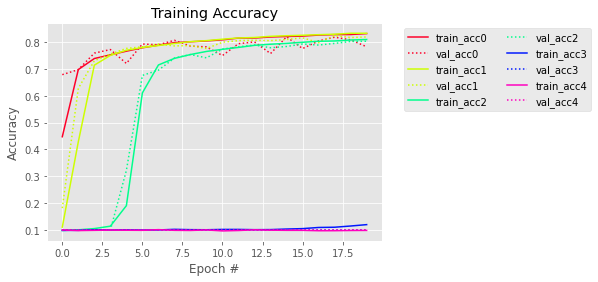

In [17]:
print("[INFO] evaluating network with sigmoid activation")
plotHistory(hist_s)

[INFO] evaluating network with relu activation


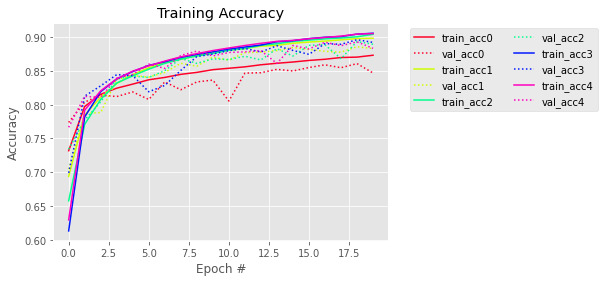

In [18]:
print("[INFO] evaluating network with relu activation")
plotHistory(hist_r)

## h)

In [19]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [20]:
import tensorflow as tf

# Taken from the keras api example under: https://keras.io/examples/vision/siamese_contrastive/

def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

  Arguments:
      margin: Integer, defines the baseline for distance for which pairs
              should be classified as dissimilar. - (default is 1).

  Returns:
      'constrastive_loss' function with data ('margin') attached.
  """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

      Arguments:
          y_true: List of labels, each label is of type float32.
          y_pred: List of predictions of same length as of y_true,
                  each label is of type float32.

      Returns:
          A tensor containing constrastive loss as floating point value.
      """

        square_pred = tf.math.square(float(y_pred))
        margin_square = tf.math.square(tf.math.maximum(margin - float(y_pred), 0))
        return tf.math.reduce_mean((1 - float(y_true)) * square_pred + float(y_true) * margin_square)

    return contrastive_loss

Epoch 1/20
469/469 [==============================] - 31s 65ms/step - loss: 0.0899 - accuracy: 0.1093 - val_loss: 0.0895 - val_accuracy: 0.1930
Epoch 2/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0892 - accuracy: 0.2244 - val_loss: 0.0887 - val_accuracy: 0.2450
Epoch 3/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0882 - accuracy: 0.2891 - val_loss: 0.0875 - val_accuracy: 0.3369
Epoch 4/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0866 - accuracy: 0.3684 - val_loss: 0.0854 - val_accuracy: 0.3912
Epoch 5/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0834 - accuracy: 0.4125 - val_loss: 0.0806 - val_accuracy: 0.4441
Epoch 6/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0757 - accuracy: 0.4776 - val_loss: 0.0699 - val_accuracy: 0.5171
Epoch 7/20
469/469 [==============================] - 31s 65ms/step - loss: 0.0633 - accuracy: 0.5953 - val_loss: 0.0577 - val_accuracy:

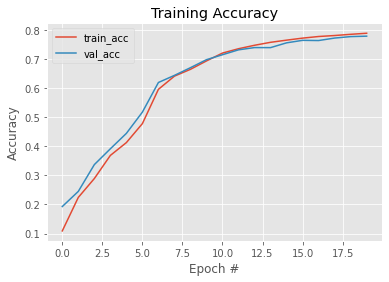

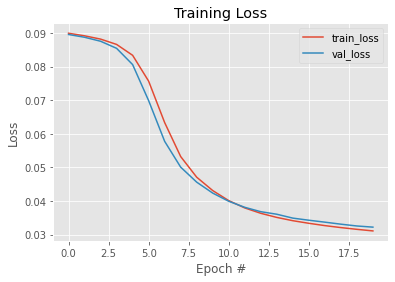

In [21]:
model.compile(loss=loss(), optimizer=sgd, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=epochs, batch_size=batch_size)
plot_trainingAccLoss(H)

Mit dem Contrastive loss ergibt sich eine Accuracy von ca. 78%. Dies ist deutlich geringer als die oben erzielten Werte von 88%.  
Somit ergibt sich in diesem Fall keine Verbesserung der Metrik.